In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
pip install tensorflow

In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plot_model

In [38]:

import numpy as np  
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

In [39]:

base_dir = 'C:/Users/ranly/Desktop/FLOWER102'
  
img_size = 224
batch = 64

In [40]:
# Create a data augmentor 
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,  
                                   zoom_range=0.2, horizontal_flip=True, 
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, 
                                  validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, 
                                                  target_size=( 
                                                      img_size, img_size), 
                                                  subset='training', 
                                                  batch_size=batch) 
test_datagen = test_datagen.flow_from_directory(base_dir, 
                                                target_size=( 
                                                    img_size, img_size), 
                                                subset='validation', 
                                                batch_size=batch) 

Found 6478 images belonging to 100 classes.
Found 1573 images belonging to 100 classes.


In [41]:
# # modelling starts using a CNN. 
  
model = Sequential() 
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', 
                 activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
  
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
  
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(100, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 128)     9728      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 28, 28, 128)      

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
epochs=30
history = model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/30
102/102 [==============================] - 2514s 25s/step - loss: 4.2660 - accuracy: 0.0701 - val_loss: 3.7621 - val_accuracy: 0.1208
Epoch 2/30
102/102 [==============================] - 2545s 25s/step - loss: 3.3370 - accuracy: 0.1900 - val_loss: 3.1651 - val_accuracy: 0.2244
Epoch 3/30
102/102 [==============================] - 2548s 25s/step - loss: 2.6809 - accuracy: 0.3095 - val_loss: 2.6937 - val_accuracy: 0.3204
Epoch 4/30
102/102 [==============================] - 2520s 25s/step - loss: 2.2421 - accuracy: 0.4027 - val_loss: 2.4651 - val_accuracy: 0.3872
Epoch 5/30
102/102 [==============================] - 2415s 24s/step - loss: 1.8345 - accuracy: 0.5032 - val_loss: 2.3400 - val_accuracy: 0.4310
Epoch 6/30
102/102 [==============================] - 2300s 22s/step - loss: 1.4705 - accuracy: 0.5937 - val_loss: 2.2327 - val_accuracy: 0.4647
Epoch 7/30
102/102 [==============================] - 2214s 22s/step - loss: 1.1905 - accuracy: 0.6788 - val_loss: 2.1112 - val_ac

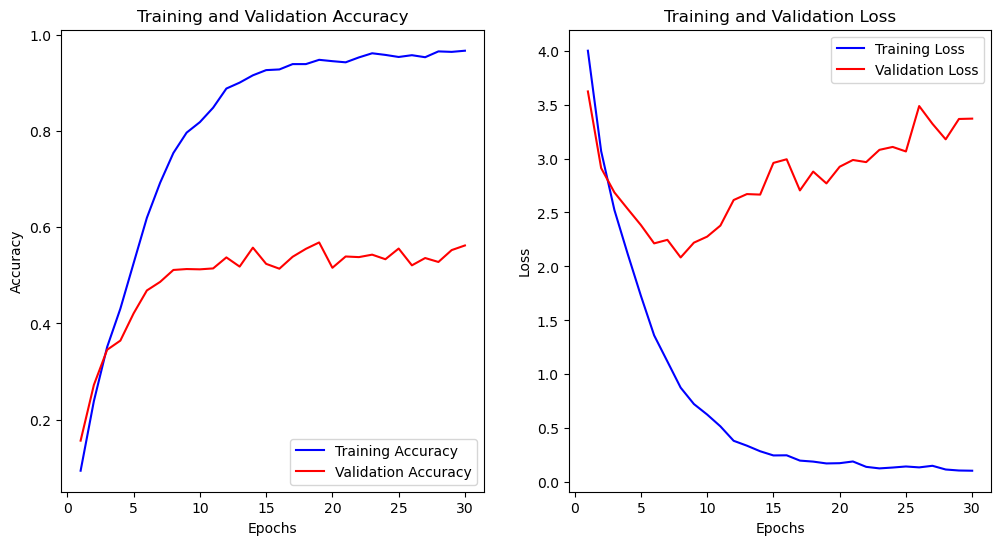

In [12]:
import matplotlib.pyplot as plt

# Your provided data for training and validation
train_loss = [3.9987, 3.0685, 2.5236, 2.1176, 1.7281, 1.3615, 1.1196, 0.8771, 0.7253, 0.6279, 0.5185, 0.3847, 0.3394, 0.2878, 0.2490, 0.2503, 0.2011, 0.1919, 0.1749, 0.1772, 0.1931, 0.1433, 0.1290, 0.1369, 0.1467, 0.1383, 0.1531, 0.1187, 0.1094, 0.1074]
train_acc = [0.0939, 0.2385, 0.3509, 0.4307, 0.5253, 0.6195, 0.6923, 0.7542, 0.7965, 0.8183, 0.8483, 0.8881, 0.9004, 0.9156, 0.9264, 0.9278, 0.9389, 0.9389, 0.9478, 0.9450, 0.9426, 0.9528, 0.9614, 0.9580, 0.9537, 0.9574, 0.9532, 0.9653, 0.9643, 0.9667]
val_loss = [3.6215, 2.9118, 2.6858, 2.5334, 2.3834, 2.2137, 2.2465, 2.0833, 2.2204, 2.2763, 2.3787, 2.6154, 2.6705, 2.6657, 2.9593, 2.9930, 2.7044, 2.8789, 2.7694, 2.9238, 2.9864, 2.9666, 3.0803, 3.1073, 3.0654, 3.4861, 3.3218, 3.1777, 3.3664, 3.3695]
val_acc = [0.1564, 0.2721, 0.3452, 0.3643, 0.4209, 0.4685, 0.4863, 0.5111, 0.5130, 0.5124, 0.5143, 0.5372, 0.5181, 0.5575, 0.5238, 0.5137, 0.5385, 0.5550, 0.5683, 0.5156, 0.5391, 0.5378, 0.5429, 0.5334, 0.5556, 0.5207, 0.5359, 0.5277, 0.5524, 0.5620]

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()


In [13]:
# Save the model to a file
model.save("Flower.keras")

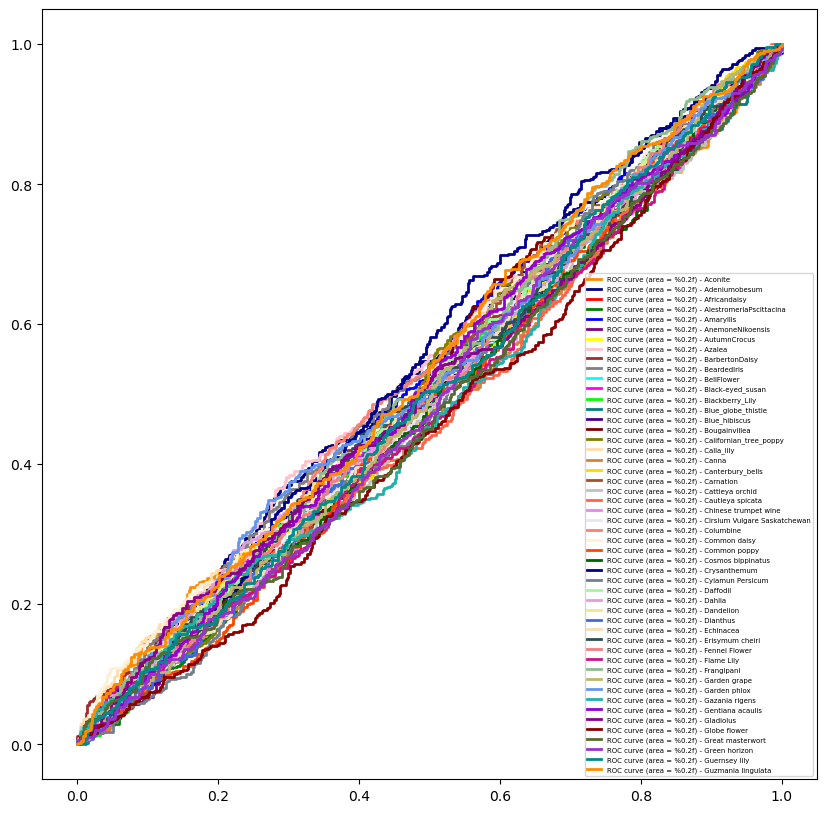

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc 
num_classes = 100
num_samples = 1000

# Replace with your actual class labels
class_labels = [ "Aconite",
    "Adeniumobesum",
    "Africandaisy",
    "AlestromeriaPscittacina",
    "Amaryllis",
    "AnemoneNikoensis",
    "AutumnCrocus",
    "Azalea",
    "BarbertonDaisy",
    "BeardedIris",
    "BellFlower",
    "Black-eyed_susan",
    "Blackberry_Lily",
    "Blue_globe_thistle",
    "Blue_hibiscus",
    "Bougainvillea",
    "Californian_tree_poppy",
    "Calla_lily",
    "Canna",
    "Canterbury_bells",
    "Carnation",
    "Cattleya orchid",
    "Cautleya spicata",
    "Chinese trumpet wine",
    "Cirsium Vulgare Saskatchewan",
    "Columbine",
    "Common daisy",
    "Common poppy",
    "Cosmos bippinatus",
    "Crysanthemum",
    "Cylamun Persicum",
    "Daffodil",
    "Dahlia",
    "Dandelion",
    "Dianthus",
    "Echinacea",
    "Erisymum cheiri",
    "Fennel Flower",
    "Flame Lily",
    "Frangipani",
    "Garden grape",
    "Garden phlox",
    "Gazania rigens",
    "Gentiana acaulis",
    "Gladiolus",
    "Globe flower",
    "Great masterwort",
    "Green horizon",
    "Guernsey lily",
    "Guzmania lingulata",
    "Helloborus orientalis",
    "Hibiscus",
    "Indian blanket",
    "Indian mallow",
    "Japanese Camelia",
    "Japanese thimbleweed",
    "Japanese toad lily",
    "Jimson weed",
    "King protea",
    "Lady's glove",
    "Lotus",
    "Mallow",
    "Marigold",
    "Mexican sunflower",
    "Milk thistle",
    "Morning glory",
    "Moth orchid",
    "Nastartium",
    "Painter's pallete",
    "Paphiopedilum Micranthum",
    "Passion flower",
    "Petunia axilaris",
    "PinkLady",
    "Poinsettia",
    "Pot marigold",
    "Prim rose",
    "Queen-of-the-alps",
    "Red ginger",
    "Rock rose",
    "Rose",
    "Ruelia Tuberosa",
    "Scabiosa Lucida Pincushion",
    "Scarlet beebalm",
    "Siam tulip",
    "Silverbush",
    "Snakeshead Fritillary",
    "Snapdragon",
    "Snowdrop anemone",
    "Star magnolia",
    "Sunflower",
    "Surfinia",
    "Sweet pea",
    "Texas bluebell",
    "Tiger lily",
    "Tilandsea cyanea",
    "Tussilago",
    "Viola cornuta",
    "White gaura",
    "Yellow Buttercup",
    "Yellow iris"
 ]

# Create example true labels and scores (you will replace these with your actual data)
y_true = np.random.randint(0, 2, size=(num_samples, num_classes))
y_score = np.random.rand(num_samples, num_classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Split class labels into two lists
num_labels_per_legend = 50  # Number of labels per legend
class_labels_part1 = class_labels[:num_labels_per_legend]
class_labels_part2 = class_labels[num_labels_per_legend:]

# Plot ROC curves for the first part of class labels
plt.figure(figsize=(10, 10))
colors = [
    'darkorange', 'navy', 'red', 'green', 'blue', 'purple', 'yellow', 'pink', 'brown', 'gray',
    'cyan', 'magenta', 'lime', 'teal', 'indigo', 'maroon', 'olive', 'navajowhite', 'peru', 'gold',
    'sienna', 'silver', 'tomato', 'violet', 'lavender', 'salmon', 'papayawhip', 'orangered', 'darkgreen', 'darkblue',
    'slategray', 'palegreen', 'plum', 'khaki', 'royalblue', 'wheat', 'darkslategray', 'lightcoral', 'mediumvioletred', 'darkseagreen',
    'darkkhaki', 'cornflowerblue', 'lightseagreen', 'darkviolet', 'darkmagenta', 'darkred', 'darkolivegreen', 'darkorchid', 'darkcyan',
]  # Add more colors as needed

# Plot ROC curves for the first part of class labels
for i in range(num_labels_per_legend):
    label = class_labels_part1[i]
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'ROC curve (area = %0.2f) - {label}')

# Add the first legend
plt.legend(loc='lower right', fontsize=5)  # Adjust the fontsize
# Show the plots
plt.show()


1/1 [==============================] - 0s 347ms/step


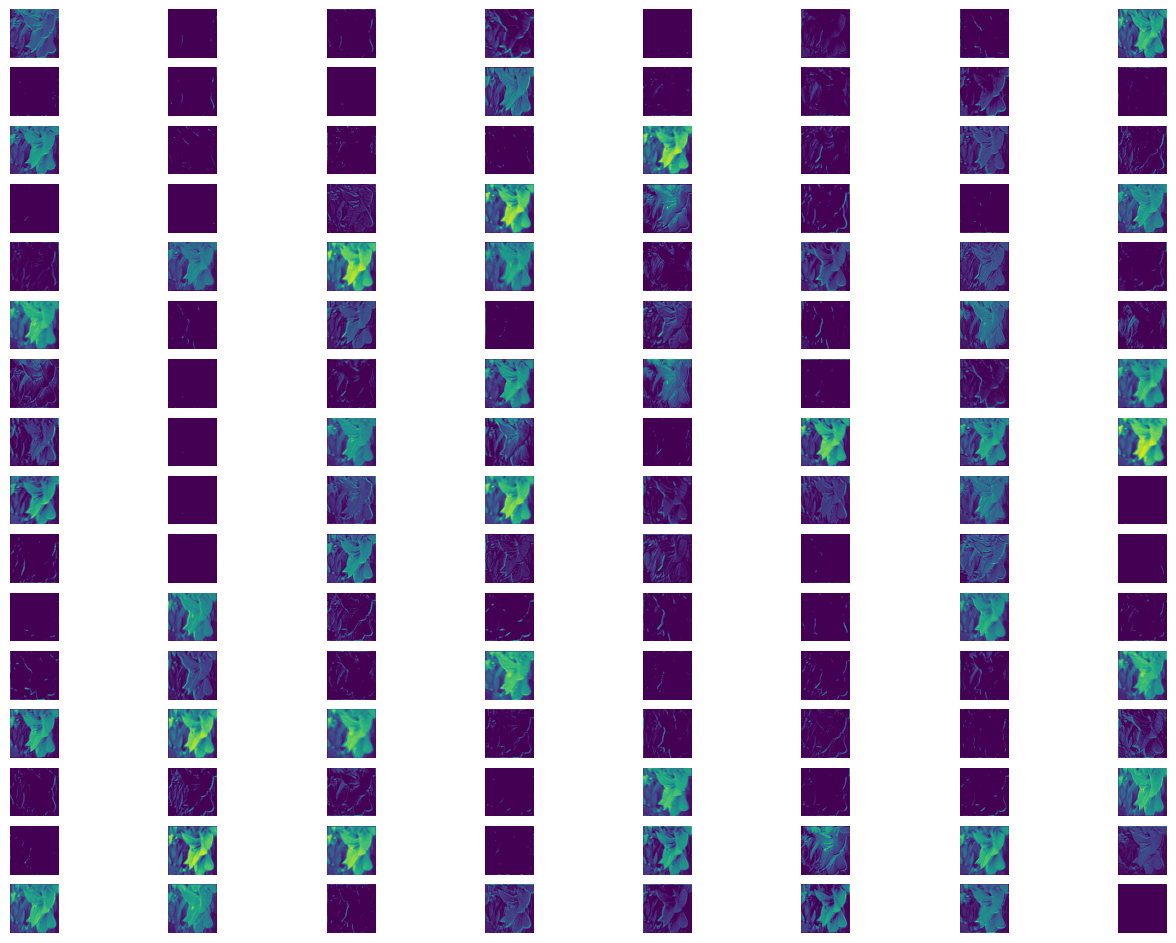

In [17]:
# to understand how the model extracts features from the input data.

import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Choose the layer for which you want to visualize feature maps
layer_index = 2  # Change this to the desired layer index

# Create a sub-model that outputs the feature maps for the chosen layer
feature_map_model = Model(inputs=model.input, outputs=model.layers[layer_index].output)

# Load an example image for visualization (replace with your image data)
image_path = 'C:/Users/ranly/Desktop/FLOWER102/Bougainvillea/image_07550.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (img_size, img_size))
image = image / 255.0  # Normalize the image

# Expand the image dimensions to match the model's input shape
image = np.expand_dims(image, axis=0)

# Get the feature maps for the input image
feature_maps = feature_map_model.predict(image)

# Plot the feature maps
num_feature_maps = feature_maps.shape[-1]
rows = num_feature_maps // 8  # You can adjust the number of columns
columns = 8

fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
for i in range(num_feature_maps):
    row = i // columns
    col = i % columns
    ax = axes[row, col]
    ax.imshow(feature_maps[0, :, :, i], cmap='viridis')  # You can change the colormap
    ax.axis('off')

plt.show()


In [29]:
pip install keras matplotlib


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install graphviz

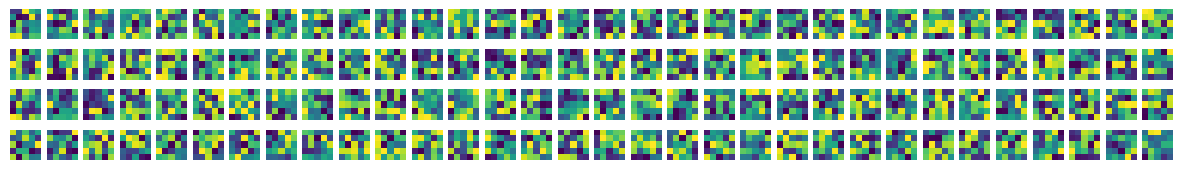

In [19]:
#Filters visualization - Visualize the filters learned by the convolutional layers in your model to gain insights into what the model is detecting in the input images.
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Replace 'model' with your specific model
conv_layer = model.layers[0]  # Assuming the first layer is a Conv2D layer

# Get the filters from the first layer
filters = conv_layer.get_weights()[0]

# Define a function to display the filters
def plot_filters(filters):
    num_filters = filters.shape[3]
    fig, axs = plt.subplots(4, num_filters // 4, figsize=(15, 2))
    axs = axs.ravel()
    for i in range(num_filters):
        axs[i].imshow(filters[:, :, 0, i], cmap='viridis')
        axs[i].axis('off')
    plt.show()

# Display the filters
plot_filters(filters)


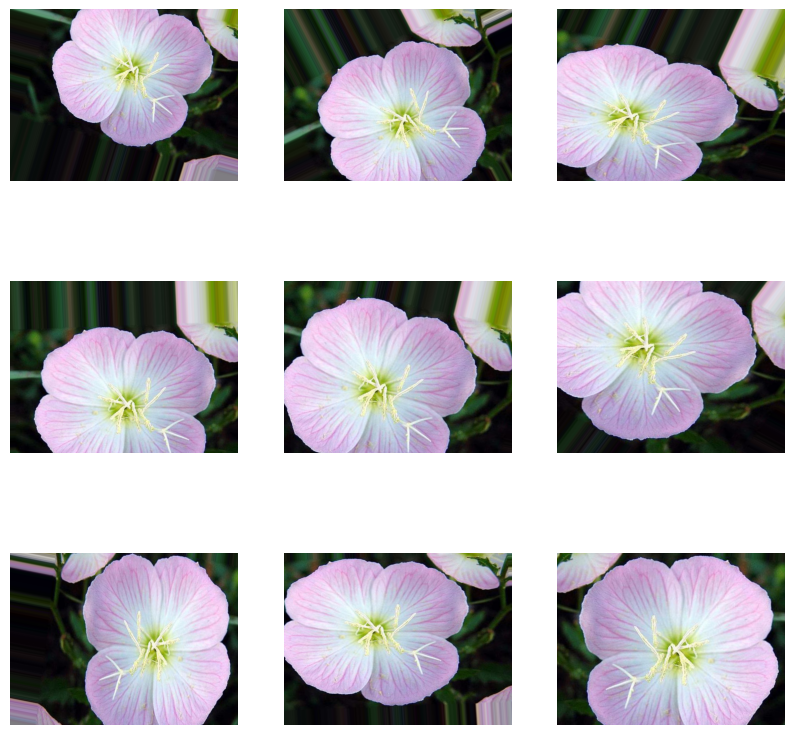

In [20]:
#data augmentation - Data augmentation is a technique to artificially increase the size of your training dataset by applying various transformations to your existing data.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define the ImageDataGenerator with desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an example image
image_path = 'C:/Users/ranly/Desktop/FLOWER102/PinkLady/image_06740.jpg'
image = load_img(image_path)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

# Generate augmented images
augment_samples = 9  # Number of augmented samples to generate
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(augment_samples):
    ax = axs[i // 3, i % 3]
    ax.axis('off')

    augmented_img = datagen.flow(x, batch_size=1).next()
    augmented_img = array_to_img(augmented_img[0])
    
    ax.imshow(augmented_img)

plt.show()
